# 双向循环神经网络

之前我们假定序列的依赖是单向的，即下一个token是什么只依赖于它之前的信息。

这是一种典型的情况，但在实际中反向依赖的情况也不少，就像填空题，只有知道了左右两边的信息才能做出最准确的判断。

双向循环神经网络添加了反向传递信息的隐藏层，以便更灵活地处理信息。

![jupyter](../images/8/birnn.svg)

计算公式为:

$$\overrightarrow{\mathbf{H}}_{t} = \phi(\mathbf{X}_{t}\mathbf{W}_{xh}^{(f)} + \overrightarrow{\mathbf{H}}_{t-1}\mathbf{W}_{hh}^{(f)} + \mathbf{b}_{h}^{(f)})$$

$$\overleftarrow{\mathbf{H}}_{t} = \phi(\mathbf{X}_{t}\mathbf{W}_{xh}^{(b)} + \overleftarrow{\mathbf{H}}_{t-1}\mathbf{W}_{hh}^{(b)} + \mathbf{b}_{h}^{(b)})$$

在输出层，我们将 $\overrightarrow{\mathbf{H}}_{t}\in\mathbb{R}^{n\times{h}}$  和  $\overleftarrow{\mathbf{H}}_{t}\in\mathbb{R}^{n\times{h}}$  连接起来得到 $\mathbf{H}_{t}\in\mathbb{R}^{n\times{2h}}$，最终：

$$\mathbf{O}_{t} = \mathbf{H}_{t}\mathbf{W}_{hq} + \mathbf{b}_{q}$$

## 训练

In [1]:
from torch import nn
import d2l

# 载入数据
batch_size, num_steps = 32, 40
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [2]:
num_hiddens = 128
# bidirectional=True使得我们的GRU是双向的
bidirect_gru_layer = nn.GRU(len(vocab), num_hiddens, bidirectional=True)
net = d2l.RNNModel(bidirect_gru_layer, len(vocab))

time travellerererererererererererererererererererererererererer


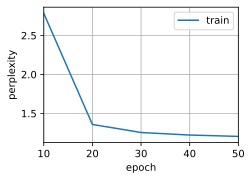

In [3]:
# 训练，好像有点问题哈*_*
num_epochs, lr = 50, 0.1
d2l.train_language_model(net, train_iter, vocab, lr, num_epochs)